In [2]:
import PIL
import torch
import torchvision
from torch import nn

In [88]:
class UNetAutoencoder(nn.Module):
    def __init__(self):
        super(UNetAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.decoder(x1)
        return x2

In [89]:
model=UNetAutoencoder()
for param in model.encoder.parameters():
    param.requires_grad = False

In [90]:
model

UNetAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): Sigmoid()
  )
)

In [91]:
a_image=PIL.Image.open("/Users/kunkerdthaisong/ipu/ntu_rgb_proj/spec/S001C001P001R001A001.skeleton.npy.png")
a_image=a_image.convert("RGB")
trans=torchvision.transforms.ToTensor()
ten_img=trans(a_image)
ten_img.shape

torch.Size([3, 344, 347])

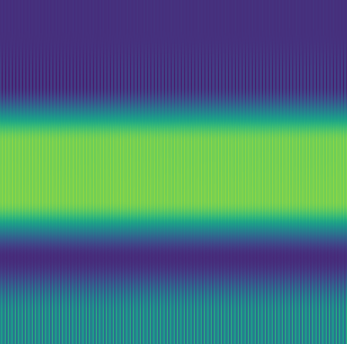

In [92]:
torchvision.transforms.functional.to_pil_image(ten_img)

In [93]:
output_tensor = model(ten_img.unsqueeze(0))
output_image = torchvision.transforms.ToPILImage()(output_tensor.squeeze(0))

In [96]:
output_tensor.shape

torch.Size([1, 3, 172, 173])